# <font color=black>Project:</font> <font color=blue>Analysis of TMDb Movie Data</font>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#questions">Asking The Right Questions</a></li>
<li><a href="#cleaning">Data Scrubbing</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have used the TMDb movie database from Kaggle (further worked on by Udacity, for this project). This dataset is interesting as it has information on cast, budget, revenue, release dates and other such information for each title. It contains over 10,000 titles and is a community built database. 

Importing the data and perusing it is the first step in order to explore this dataset and think about the kind of insights that can be drawn from it.

In [95]:
#Bringing in the right packages that are needed to investigate this data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

To assess the quality of the data, I am importing the dataset to see what fields it contains and it's data types. I will also look for any missing/ incomplete/ erroneous data and find ways to fix it. 

### Reading the Data:

In [96]:
# Loading Data to look into its basic charecteristics
movie_data = pd.read_csv('tmdb-movies.csv')
movie_data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### Checking basic information about the data set:

In [97]:
#Checking for column info and the type of data types that exist
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Basic information:
From the above, we can easily gather some basic information about this dataset:
- The data set has information on 10866 movies 
- It has 21 columns or 21 fields of information
- Many columns have lesser than 10866 entries meaning that there is missing information in these columns

### Information on missing data: 
This is important to know as it might have an effect on our analysis and might skew trends.

In [98]:
movie_data.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<a id='questions'></a>
## Asking the Right Questions
While there is no limit to the ways in which this data set can be sliced to answer a variety of questions, based on my initial understanding of the data,the following questions come to mind and will be investigated further. 
  - What is the trend of the number of movies released? Has it increased over time?
  - Which are the top revenue generating movies?
  - Are the most revenue generating movies also the most profitable?
  - Do high budget movies make the most money?
  - Check for seasonality: Do some months release more movies than others?
  - Which genre had the most releases over time?
  - Which Actors are cast in the most number of movies?
  - Which Production Companies had the most releases?
    
There are many more trends and correlations that can be explored, I will only investigate these questions for the purposes of this project. 


<a id='cleaning'></a>
## Scrubbing Data
In this section, I detect and remove data that is not needed and clean the data that we will use for our investigation.

**1. Removing Duplicates**

In [99]:
#Checking how many duplicate rows exist
sum(movie_data.duplicated())

1

In [100]:
#Removing the duplicate rows
movie_data.drop_duplicates(inplace=True)

In [101]:
#Checking duplicates are removed
sum(movie_data.duplicated())

0

**2. Drop or remove columns that will not be needed**

In [102]:
#Current number of rows and columns in the dataset
print("The current information in the movie_data data set is (Rows,Columns):",movie_data.shape)

#Dropping columns that won't be needed for this investigation
movie_data.drop(['homepage','tagline','overview','imdb_id','vote_count','vote_average','keywords','director'], axis =1, inplace =True)

The current information in the movie_data data set is (Rows,Columns): (10865, 21)


In [103]:
#New number of rows and columns in the dataset
print("The new information in the movie_data data set is (Rows,Columns):", movie_data.shape)

The new information in the movie_data data set is (Rows,Columns): (10865, 13)


**3. Correcting the format of Release Date from Str to Datetime**

In [104]:
#### Changing the format of the release date column
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'])

#Checking if the format changed
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   runtime               10865 non-null  int64         
 7   genres                10842 non-null  object        
 8   production_companies  9835 non-null   object        
 9   release_date          10865 non-null  datetime64[ns]
 10  release_year          10865 non-null  int64         
 11  budget_adj            10865 non-null  float64       
 12  revenue_adj           10865 non-null  float64       
dtypes: datetime64[ns

**4. Check for 0 Budget and 0 Revenue Movies and Fix them**
<br> Movies with no budget or movies which generated no revenue are replaced with null otherwise they may skew calculations.

In [137]:
#Replace zero values with null values in the budget and revenue column.
movie_data['budget'] = movie_data['budget'].replace(0, np.NaN)
movie_data['revenue'] = movie_data['revenue'].replace(0, np.NaN)

In [138]:
#Checking if the format changed
movie_data.info()

print("We cans see the budget and revenue column changed here in comparison to the previous check")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                5169 non-null   float64       
 3   revenue               4849 non-null   float64       
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   runtime               10865 non-null  int64         
 7   genres                10842 non-null  object        
 8   production_companies  9835 non-null   object        
 9   release_date          10865 non-null  datetime64[ns]
 10  release_year          10865 non-null  int64         
 11  budget_adj            10865 non-null  float64       
 12  revenue_adj           10865 non-null  float64       
dtypes: datetime64[ns

<a id='eda'></a>
## Exploratory Data Analysis

Finding answers to the questions previously listed using multiple angles and relevant statistical methods.

**1. What is the trend of the number of movies released? Has it increased over time?**

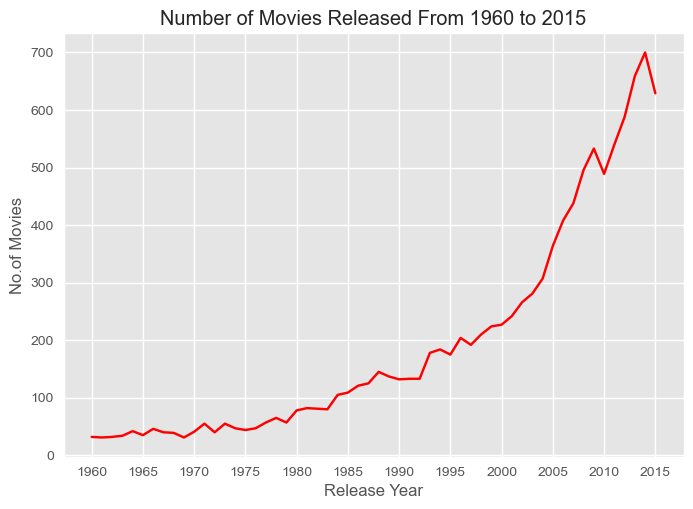

In [255]:
#Making a plot of number of movies released over time.This is done by using groupby.
movie_data.groupby('release_year').count()['id'].plot(kind='line',title = "Number of Movies Released From 1960 to 2015", color = 'red')
plt.xlabel('Release Year')
plt.ylabel('No.of Movies')
plt.xticks(np.arange(1960, 2016, 5)) #we can change from 5 to other intervals of ticks to see data in a more granular/ wider manner
plt.style.use('ggplot')

> **Observations:**
> There appears to be an increase in the number of movies over time, however we can observe a slight dip in the number of movies released in the late 80s and early 90s. The trend seems to have picked up and we can see a steady climb from 2000 up until 2008 where we can see a dip. We can also see that the year 2014 saw the most number of releases.

**2. Which are the top revenue generating movies?**

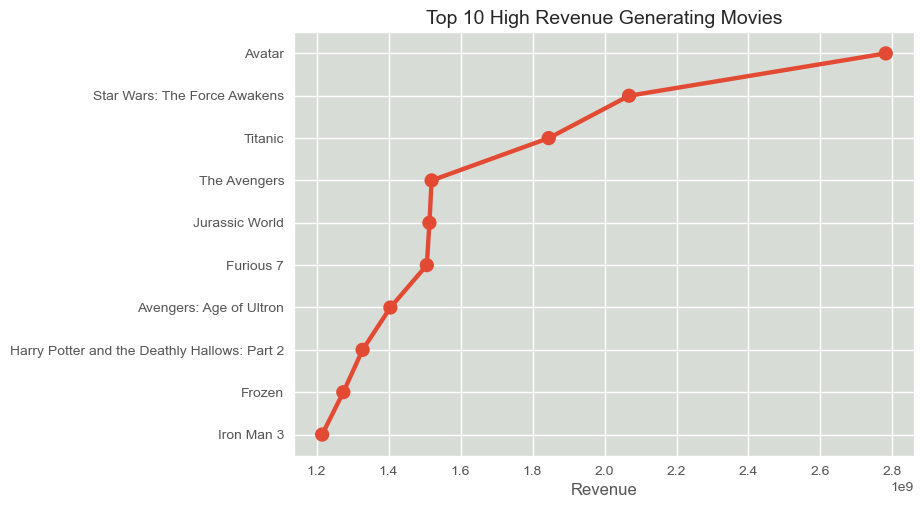

In [272]:
#Plot the top ten movies by revenue
revenueplot = pd.DataFrame(movie_data['revenue'].sort_values(ascending= False))
revenueplot['original_title'] = movie_data['original_title']
data=list(map(str,(revenueplot['original_title'])))
x_values = list(revenueplot['revenue'][:10])
y_values = list(data[:10])
plot = sns.pointplot(x_values,y_values)
plot.set_title("Top 10 High Revenue Generating Movies", fontsize = 14)
plot.set_xlabel('Revenue', fontsize=12)
plot.set_facecolor('xkcd:light grey')
plot.grid(color='white', linestyle='-');

> **Observations:**
> We can see that Avatar was the highest revenue generating movie making well over 2.7B. We can see that the movies have no obvious pattern in terms of cast or direction. However, there are 3 movies that are from the Marvel Superhero Movie Franchise that have made it to this list. 

**3. Are the most revenue generating movies also the most profitable (how are revenue and profit related)?**

In [199]:
#Adding a column in the movie-data for Profit, Profit = Revenue - Budget
movie_data['Profit'] = movie_data['revenue'] - movie_data['budget']
#To check the new column exists
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                5169 non-null   float64       
 3   revenue               4849 non-null   float64       
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   runtime               10865 non-null  int64         
 7   genres                10842 non-null  object        
 8   production_companies  9835 non-null   object        
 9   release_date          10865 non-null  datetime64[ns]
 10  release_year          10865 non-null  int64         
 11  budget_adj            10865 non-null  float64       
 12  revenue_adj           10865 non-null  float64       
 13  Profit          

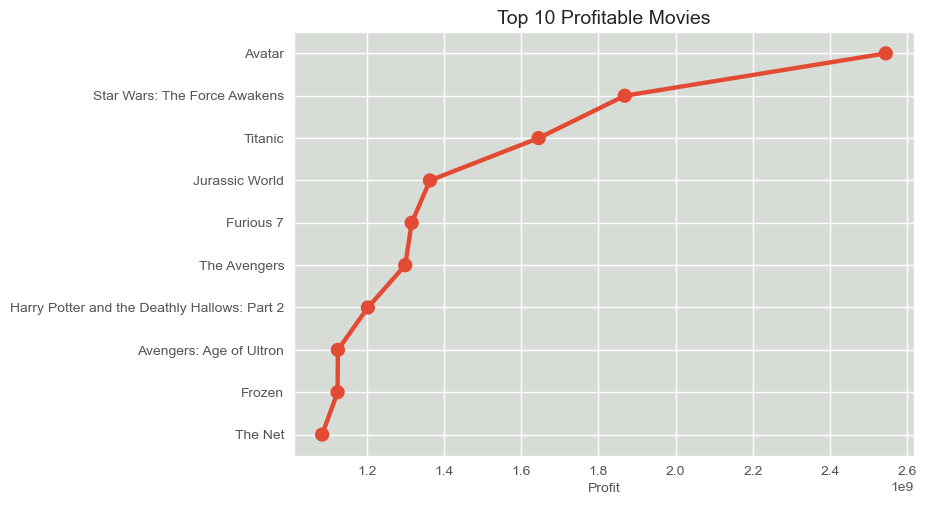

In [277]:
#Plotting the most profitable ten movies now
profitplot = pd.DataFrame(movie_data['Profit'].sort_values(ascending= False))
profitplot['original_title'] = movie_data['original_title']
data=list(map(str,(profitplot['original_title'])))
x_values = list(profitplot['Profit'][:10])
y_values = list(data[:10])
plot = sns.pointplot(x_values,y_values)
plot.set_title("Top 10 Profitable Movies", fontsize = 14)
plot.set_xlabel('Profit', fontsize=10)
plot.set_facecolor('xkcd:light grey')
plot.grid(color='white', linestyle='-');

> **Observations:**
> It is interesting to see the same names of movies come up in this plot as well. It points at a correlation between profits and revenue generated that needs to be explored further. It is also interesting to note that "The Net" was a movie that did not generate high revenue (per our previous plot) but appears in the top list of profits (indicating that it might have recovered well above what was spent on the movie). 

Correlation Between Revenue And Profit :  0.9791333955736232


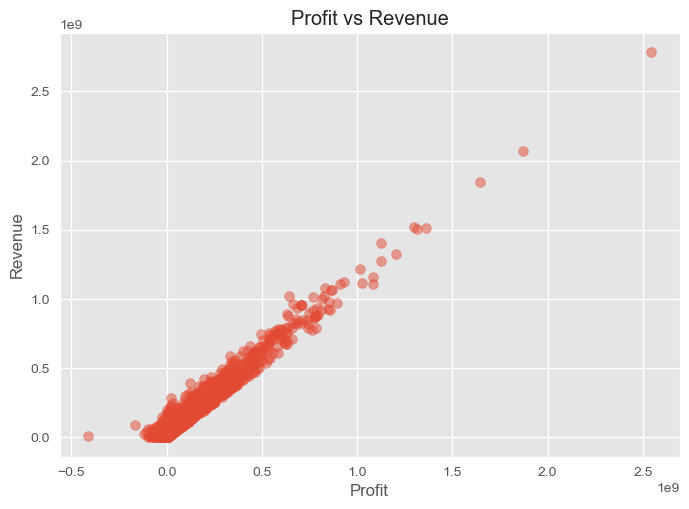

In [262]:
#Plot the correlation of Revenue and Profit
plt.scatter(movie_data.Profit, movie_data.revenue, alpha = 0.5)
plt.xlabel('Profit')
plt.ylabel('Revenue')
plt.title('Profit vs Revenue')
plt.style.use('ggplot');

#Find the correlation
#it returns a dataframe which contain the correlation between all the numeric columns.
data_corr = movie_data.corr()
print("Correlation Between Revenue And Profit : ",data_corr.loc['revenue','Profit'])

> **Observations:**
> It makes sense that there was a repeat in the movies list for top revenue and top profit as there is a strong positive correlation of 0.97. However, there are definite outliers to this and it is clear that high revenue does not imply high profit.

**4.Do high budget movies make the most money?**

Correlation Between Budget And Profit :  0.5268176539924057


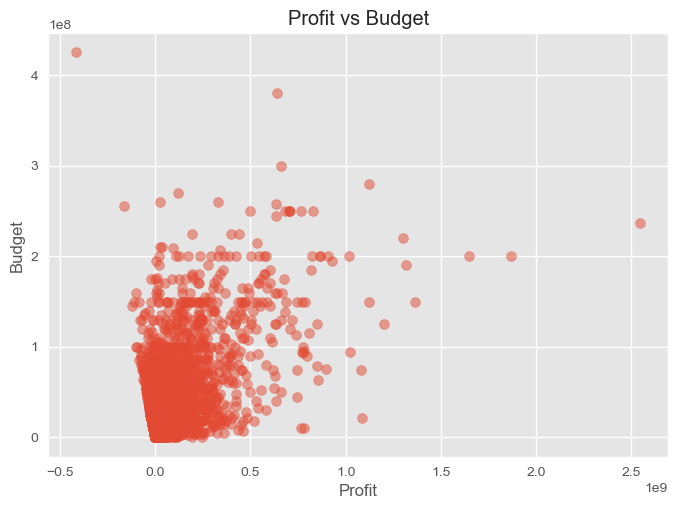

In [263]:
#Plot the correlation of Budget and Profit
plt.scatter(movie_data.Profit, movie_data.budget, alpha = 0.5)
plt.xlabel('Profit')
plt.ylabel('Budget')
plt.title('Profit vs Budget')
plt.style.use('ggplot');

#Find the correlation
#it returns a dataframe which contain the correlation between all the numeric columns.
data_corr = movie_data.corr()
print("Correlation Between Budget And Profit : ",data_corr.loc['budget','Profit'])

> **Observations:**
> With a positive correlation of 0.53, we can see that it is possible that higher pudget movies are more profitable. However, we can see some obvious outliers in the chart above as well, indicating that increase in one does not cause increase in the other variable.

**5. Do some months see more movie releases than others?**

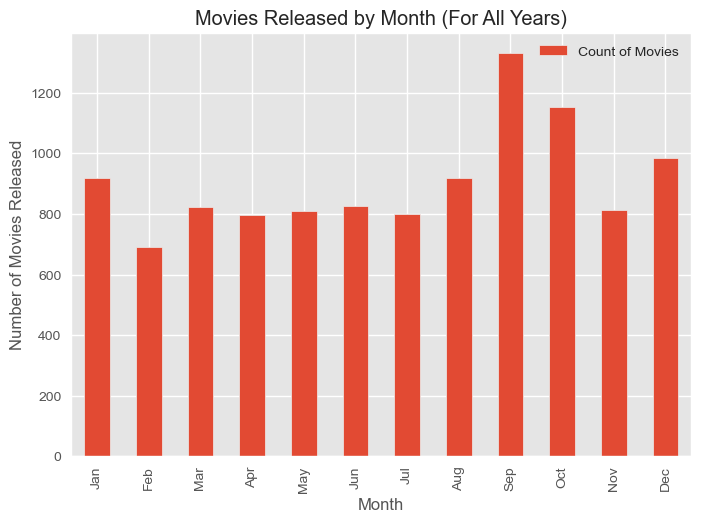

In [289]:
#Use release date to extract month
release_month = movie_data['release_date'].dt.month

#Count how many movies were released in each month (in all the years)
release_count = release_month.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
release_count = pd.DataFrame(release_count)
release_count['month'] = months
release_count.rename(columns = {'release_date':'Count of Movies'},inplace=True)

#Plot the count of movies for each month
release_count.plot(x='month',kind='bar')
plt.title('Movies Released by Month (For All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.style.use('ggplot');

> **Observations:**
>It appears that September and October have the highest number of releases. I looked this up to see if this was a general trend in the movie industry and I found the concept of ["Dump Months"](https://movies.mxdwn.com/feature/dump-months-what-are-they-and-what-do-they-entail/). These are months where production houses release a large number of movies in order to fulfil contractual obligations (even if those movies tested poorly or are known to not be commercialy viable). As Sept might mark the end of summer and beginning of fall in Western countries (where there is a large market for English movies) it may be a dump month. This might be a related attribute, however more analysis is needed to verify this hypothesis. 

**6. Which genre had the most releases over time?**
<br>We know from our initial view of the dataset that the genres column has multiple entries seperated by | . We would need to first split this string and then return a count of each genre to see which genre had the most releases.

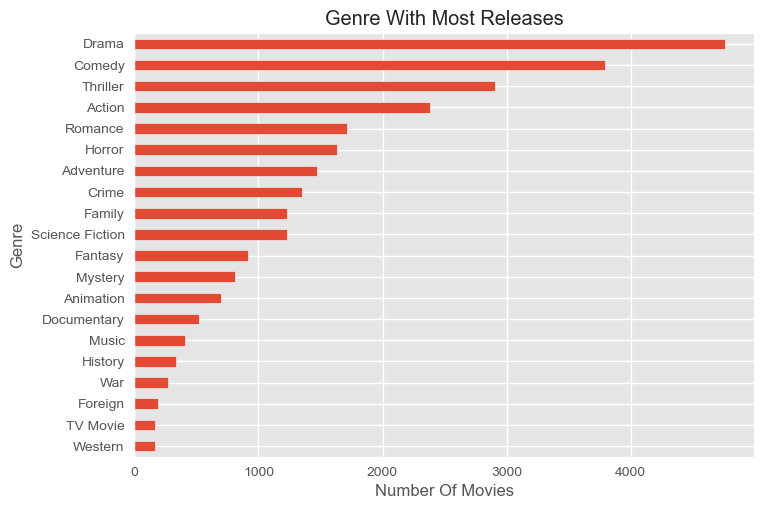

In [304]:
#Building a function to split the string
def count_genre(a):
    genre = movie_data[a].str.cat(sep = '|')
    newdata = pd.Series(genre.split('|'))
#Counts and returns the genre
    info = newdata.value_counts(ascending=True)
    return info
#Count total movies in each genre by calling the above function
total_movies = count_genre('genres')

#Plotting a horizontal bar chart for Genre vs. Number of Movies
total_movies.plot(kind= 'barh')
plt.title("Genre With Most Releases")
plt.xlabel('Number Of Movies')
plt.ylabel("Genre")
plt.style.use('ggplot');

> **Observations:**
> Movies in the drama and comedy genre seem to have the most number of movies released. The genres with the least number of movies are Western & TV Movies. 

**7. Which actors are cast in the most number of movies?**
<br>We know from our initial view of the dataset that the cast column has multiple entries seperated by | . Since in the previous section, I addressed a similar issue, I will repeat similar steps here.

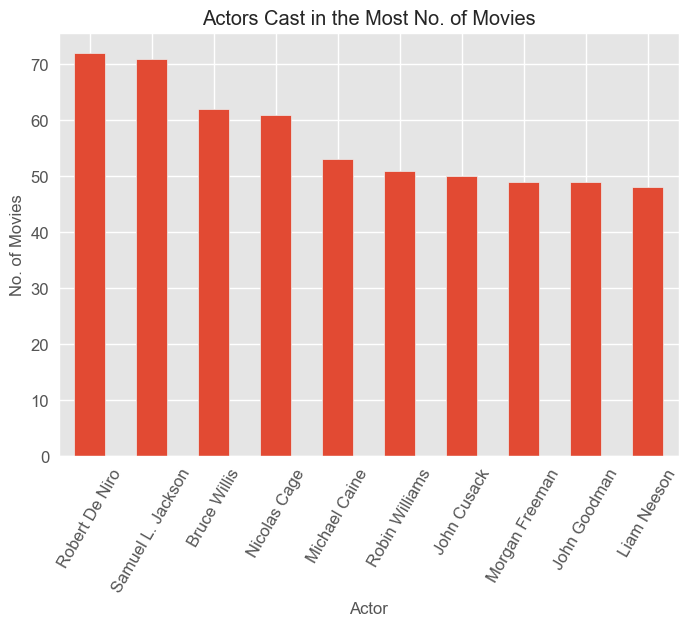

In [316]:
#Building a function to split the string
def count_cast(a):
    cast = movie_data[a].str.cat(sep = '|')
    newdata = pd.Series(cast.split('|'))
#Counts and returns the genre
    info = newdata.value_counts(ascending=False)
    return info
#Count total movies for each cast by calling the above function
ttl_movies = count_cast('cast')

#Plotting a horizontal bar chart (Limiting to 10 actors only as the list is exhaustive)
ttl_movies.iloc[:10].plot.bar(fontsize=12)
plt.title("Actors Cast in the Most No. of Movies")
plt.xticks(rotation = 60)
plt.xlabel('Actor')
plt.ylabel('No. of Movies')
plt.style.use('ggplot');

> **Observations:**
> Robert De Niro seems to be a popular casting choice! He has acted in over 70 movies between 1960 and 2016. Samuel L. Jackson is a close second. 

**8. Which Production Companies had the most releases?**
<br>We know from our initial view of the dataset that the production_companies column has multiple entries seperated by | . Since in the previous section, I addressed a similar issue, I will call the same function for this as well.

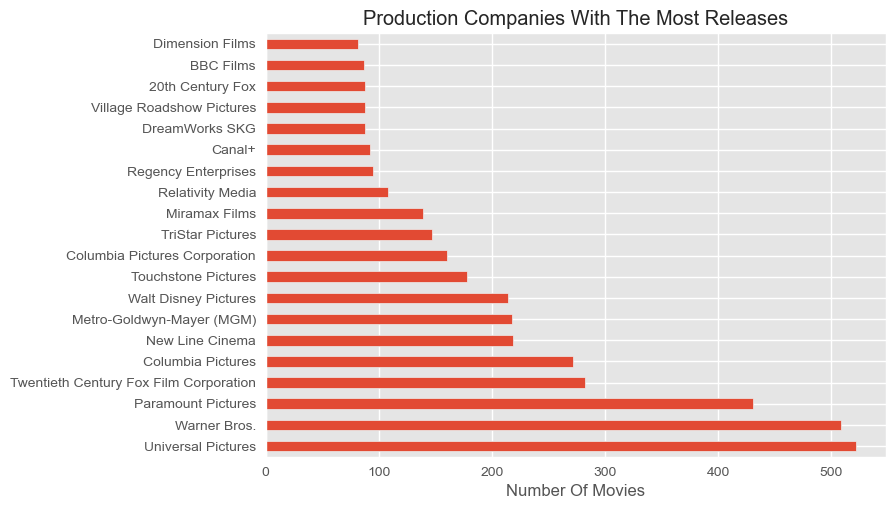

In [338]:
#Using the previously built function, we can split for production companies as well.
pc = count_cast('production_companies')

#Plotting a horizontal bar chart
pc.iloc[:20].plot(kind='barh')
plt.title("Production Companies With The Most Releases")
plt.xlabel('Number Of Movies')
plt.style.use('ggplot');

> **Observations:**
> Universal Pictures & Warner Bros. appear to have the most number of movie releases and in close competition. Paramount Pictures comes in 3rd. It may also be interesting to note that some production houses have fewer releases because they were founded much later in time (example: Dimension Films was founded only in 1992), however this correlation needs to be explored further to verify this hypothesis. 

<a id='conclusions'></a>
## Conclusions

Observations after each question will help us understand and interpret the data. To summarize what I have investigated in this TMDb Data Set: 
- The year 2014 saw the most number of movie releases in the 1960-2016 period. 
- Avatar, Star Wars: The Force Awakens and Titanic are the highest revenue generating movies during the time period assessed.
- Avatar, Star Wars: The Force Awakens and Titanic are also the most profitable movies in the time period asssessed. Looking into this further and extending to Top 10 movies in each category (highest revenue and highest profit), I saw that a movie called The Net did not generate high revenue (not top 10) but was in the Top 10 profitable movies. Although there is a strong correlation, this is a good example to show that the two variables may be closely related but it does not mean every instance of change in one causes a change in the other. 
- While it appears that a higher budget will yield in a profitable movie (positive correlation), it is interesting to see that many movies even with low budgets are profitable indicating clear exceptions. 
- September and October have the highest numbers of movies released. The lowest number of movies are released in February.
- Drama and comedy genre of movies have the most number of releases. Western & TV movies have the least number of releases. 
- Robert De Niro and Samuel L Jackson are cast in the most number of movies. 
- Universal Pictures and Warner Bros. have made the most number of movies in the time period assessed. 

<a id='limitations'></a>
## Limitations

- There is no indication of the currency for revenue or budget. I have assumed USD to be the currency for the purposes of this analysis.
- Metrics such as popularity, while a good data point to use, did not have proper definition and hence I chose not to use it. 
- Although the adjusted revenue and budget is provided (adjusted to 2010), I did not use those columns and used revenue and budget instead. 
- I used seperate and then counted columns like genres, cast and production_companies to assess Top 10s. However, it might also be a case of a multi-genre movie (example Romantic|Comedy) or a large cast based movie (one with many actors) that get more movie releases - this remains unexplored. 